# Building Financial Reports

You have two datasets at your disposal: `Balance_Sheet.xlsx` and `Income_Statement.xlsx`. Both these datasets have three columns in common:
- `"Company"`: The company's ticker name.
- `"comp_type"` The type of industry the company in question belongs to. It is either `"tech"` for companies in the technology industry, `"fmcg"` for companies in the fast-moving consumer goods industry, and `"real_est"` for companies in the real estate industry. 
- `"Year"`: The year the company's information is from.

The rest of the columns in the datasets contain information from the financial statement of the `"Company"` in question. Note that the columns in `Balance_Sheet.xlsx` only contain financial information from the balance sheet. Similarly, the columns in `Income_Statement.xlsx` only contain financial information from the income statement. The columns are named accordingly. For instance, the column `"Total Liab"` from `Balance_Sheet.xlsx` is the total liability.

## Solution:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
balance_sheet = pd.read_excel("Balance_Sheet.xlsx")
balance_sheet.sample(5)

,Unnamed: 0,Year,comp_type,company,Accounts Payable,Cash,Inventory,Property Plant Equipment,Short Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Liab,Total Stockholder Equity
41,41,2019,fmcg,NSRGY,14017000000,7469000000,9.343000e+09,28762000000,2.794000e+09,127940000000,35663000000,41615000000,75078000000,52035000000
57,57,2019,fmcg,KO,3804000000,6480000000,3.379000e+09,12210000000,4.695000e+09,86381000000,20411000000,26973000000,65283000000,18981000000
37,37,2019,real_est,WY,246000000,139000000,4.160000e+08,14429000000,NaN,16406000000,1611000000,1006000000,8229000000,8177000000
2,2,2021,tech,AAPL,54763000000,34940000000,6.580000e+09,49527000000,2.769900e+10,351002000000,134836000000,125481000000,287912000000,63090000000
56,56,2018,fmcg,KO,2719000000,9077000000,3.071000e+09,9598000000,7.038000e+09,83216000000,24930000000,28782000000,64158000000,16981000000


In [3]:
income_sheet = pd.read_excel("Income_Statement.xlsx")
income_sheet.sample(5)

,Unnamed: 0,Year,comp_type,company,Cost Of Goods Sold,Gross Profit,Operating Income,Total Operating Expenses,Total Revenue
56,56,2018,fmcg,KO,13067000000,21233000000,10203000000,24097000000,34300000000
33,33,2019,real_est,SPG,1021644000,4649345000,2828587000,2842402000,5670989000
35,35,2021,real_est,SPG,971064000,4143625000,2411090000,2703599000,5114689000
43,43,2021,fmcg,NSRGY,45468000000,42002000000,14904000000,72566000000,87470000000
22,22,2020,real_est,BAM,53177000000,9496000000,9395000000,53278000000,62673000000


In [4]:
df_ratios = pd.DataFrame()

# debt-to-equity ratio
df_ratios["leverage_ratio"] = balance_sheet["Total Liab"]/balance_sheet["Total Stockholder Equity"]

# gross margin ratio
df_ratios["profitability_ratio"] = (income_sheet["Total Revenue"] - income_sheet["Cost Of Goods Sold"])/income_sheet["Total Revenue"]

df_ratios.head(5)

,leverage_ratio,profitability_ratio
0,2.741004,0.378178
1,3.957039,0.382332
2,4.563512,0.417794
3,5.961537,0.433096
4,1.800313,0.659020


In [5]:
df_ratios1 = pd.concat([df_ratios, income_sheet["comp_type"]], axis=1)
df_ratios_comp_type = df_ratios1.groupby(by=["comp_type"]).mean()

# lowest_profitability
lowest_profitability = df_ratios_comp_type["profitability_ratio"].idxmin()

# highest_leverage
highest_leverage = df_ratios_comp_type["leverage_ratio"].idxmax()

print([lowest_profitability, highest_leverage])

['fmcg', 'real_est']


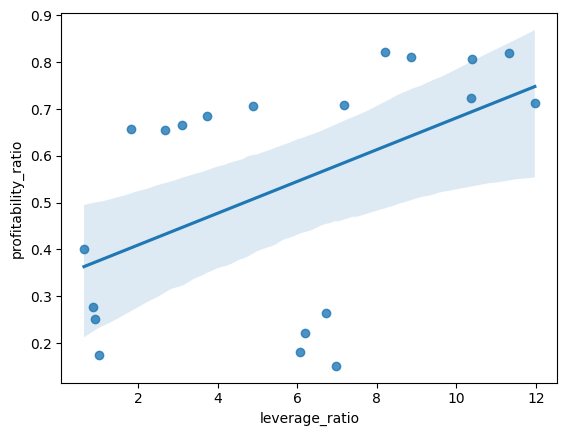

In [6]:
# relationship between leverage and profitability in real_est
df_ratios_real_est = df_ratios1.loc[df_ratios1["comp_type"] == "real_est"]
df_ratios_real_est
sns.regplot(x = "leverage_ratio", y = "profitability_ratio", data = df_ratios_real_est)
relationship = "positive"